<a href="https://colab.research.google.com/github/jstangelbellarmine/MLA_JRS/blob/main/MLA1_JRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1
John Stangel
CS430-ON
Machine Learning in the Cloud

This section imports our libraries as shown in this week's lectures. I also imported this last section so that my graphs woudl show up on screen.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Accesses Google Drive, where a data file is stored.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This section uploads the data in weather_2012 and displays it to check if successful.

In [11]:
file_path = '/content/drive/My Drive/weather_2012.csv'
df = pd.read_csv(file_path)

print(df.head())

       Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  \
0  1/1/2012 0:00      -1.8                -3.9           86                4   
1  1/1/2012 1:00      -1.8                -3.7           87                4   
2  1/1/2012 2:00      -1.8                -3.4           89                7   
3  1/1/2012 3:00      -1.5                -3.2           88                6   
4  1/1/2012 4:00      -1.5                -3.3           88                7   

   Visibility (km)  Stn Press (kPa)               Weather  
0              8.0           101.24                   Fog  
1              8.0           101.24                   Fog  
2              4.0           101.26  Freezing Drizzle,Fog  
3              4.0           101.27  Freezing Drizzle,Fog  
4              4.8           101.23                   Fog  


shows first 5, last 5, and samples 5 at random.

In [12]:
print(df.head())
print(df.tail())
print(df.sample(5))


       Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  \
0  1/1/2012 0:00      -1.8                -3.9           86                4   
1  1/1/2012 1:00      -1.8                -3.7           87                4   
2  1/1/2012 2:00      -1.8                -3.4           89                7   
3  1/1/2012 3:00      -1.5                -3.2           88                6   
4  1/1/2012 4:00      -1.5                -3.3           88                7   

   Visibility (km)  Stn Press (kPa)               Weather  
0              8.0           101.24                   Fog  
1              8.0           101.24                   Fog  
2              4.0           101.26  Freezing Drizzle,Fog  
3              4.0           101.27  Freezing Drizzle,Fog  
4              4.8           101.23                   Fog  
             Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
8779  12/31/2012 19:00       0.1                -2.7           81   
8780  12/31/2012 20:0

displays the names of each  column.

In [13]:
print(df.columns)

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')


Renames each column so it is more concise and clear.

In [14]:
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']
print(df.head())


       date_time  temp_c  dew_point  relative_humidity  wind_speed  \
0  1/1/2012 0:00    -1.8       -3.9                 86           4   
1  1/1/2012 1:00    -1.8       -3.7                 87           4   
2  1/1/2012 2:00    -1.8       -3.4                 89           7   
3  1/1/2012 3:00    -1.5       -3.2                 88           6   
4  1/1/2012 4:00    -1.5       -3.3                 88           7   

   visibility  pressure               weather  
0         8.0    101.24                   Fog  
1         8.0    101.24                   Fog  
2         4.0    101.26  Freezing Drizzle,Fog  
3         4.0    101.27  Freezing Drizzle,Fog  
4         4.8    101.23                   Fog  


Uses the .describe operator to list numeric data trends

In [15]:
print(df.describe())


            temp_c    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean      8.798144     2.555294          67.431694    14.945469    27.664447   
std      11.687883    10.883072          16.918881     8.688696    12.622688   
min     -23.300000   -28.500000          18.000000     0.000000     0.200000   
25%       0.100000    -5.900000          56.000000     9.000000    24.100000   
50%       9.300000     3.300000          68.000000    13.000000    25.000000   
75%      18.800000    11.800000          81.000000    20.000000    25.000000   
max      33.000000    24.400000         100.000000    83.000000    48.300000   

          pressure  
count  8784.000000  
mean    101.051623  
std       0.844005  
min      97.520000  
25%     100.560000  
50%     101.070000  
75%     101.590000  
max     103.650000  


Creates a formula to convert Celcius to Fahrenheit and create a temp_f column  

In [16]:
df['temp_f'] = df['temp_c'] * 9/5 + 32
print(df.head())

       date_time  temp_c  dew_point  relative_humidity  wind_speed  \
0  1/1/2012 0:00    -1.8       -3.9                 86           4   
1  1/1/2012 1:00    -1.8       -3.7                 87           4   
2  1/1/2012 2:00    -1.8       -3.4                 89           7   
3  1/1/2012 3:00    -1.5       -3.2                 88           6   
4  1/1/2012 4:00    -1.5       -3.3                 88           7   

   visibility  pressure               weather  temp_f  
0         8.0    101.24                   Fog   28.76  
1         8.0    101.24                   Fog   28.76  
2         4.0    101.26  Freezing Drizzle,Fog   28.76  
3         4.0    101.27  Freezing Drizzle,Fog   29.30  
4         4.8    101.23                   Fog   29.30  


Moves the Fahrenheit column to appear right before the Celcius column.

In [17]:
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]
print(df.head())

       date_time  temp_f  temp_c  dew_point  relative_humidity  wind_speed  \
0  1/1/2012 0:00   28.76    -1.8       -3.9                 86           4   
1  1/1/2012 1:00   28.76    -1.8       -3.7                 87           4   
2  1/1/2012 2:00   28.76    -1.8       -3.4                 89           7   
3  1/1/2012 3:00   29.30    -1.5       -3.2                 88           6   
4  1/1/2012 4:00   29.30    -1.5       -3.3                 88           7   

   visibility  pressure               weather  
0         8.0    101.24                   Fog  
1         8.0    101.24                   Fog  
2         4.0    101.26  Freezing Drizzle,Fog  
3         4.0    101.27  Freezing Drizzle,Fog  
4         4.8    101.23                   Fog  


diplsays all the data sets types

In [18]:
print(df.dtypes)


date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


Converts the format for the data file to actual Pandas date-time structure.

In [19]:
df['date_time'] = pd.to_datetime(df['date_time'])
print(df.dtypes)


date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object


creates a monthly_avg list, or the list of average temperatures across the year.

In [20]:
df['month'] = df['date_time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()
print(monthly_avg)

month
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


scatterplot that compares temperature and relative humidty.

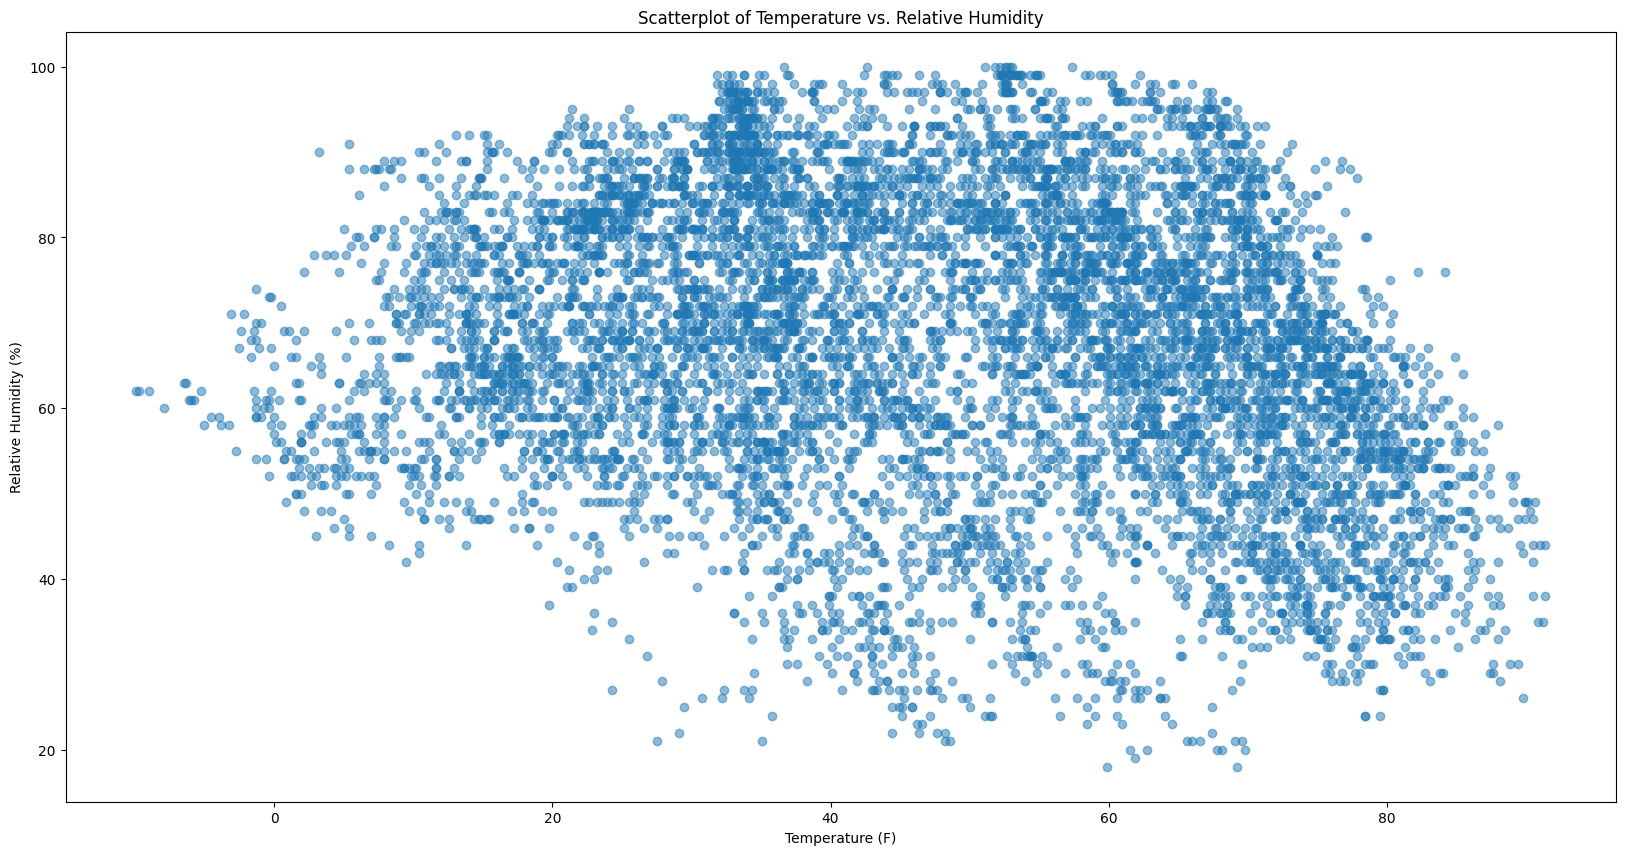

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(df['temp_f'], df['relative_humidity'], alpha=0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Relative Humidity (%)')
plt.title('Scatterplot of Temperature vs. Relative Humidity')
plt.show()

Line chart that shows averages temperature each month.

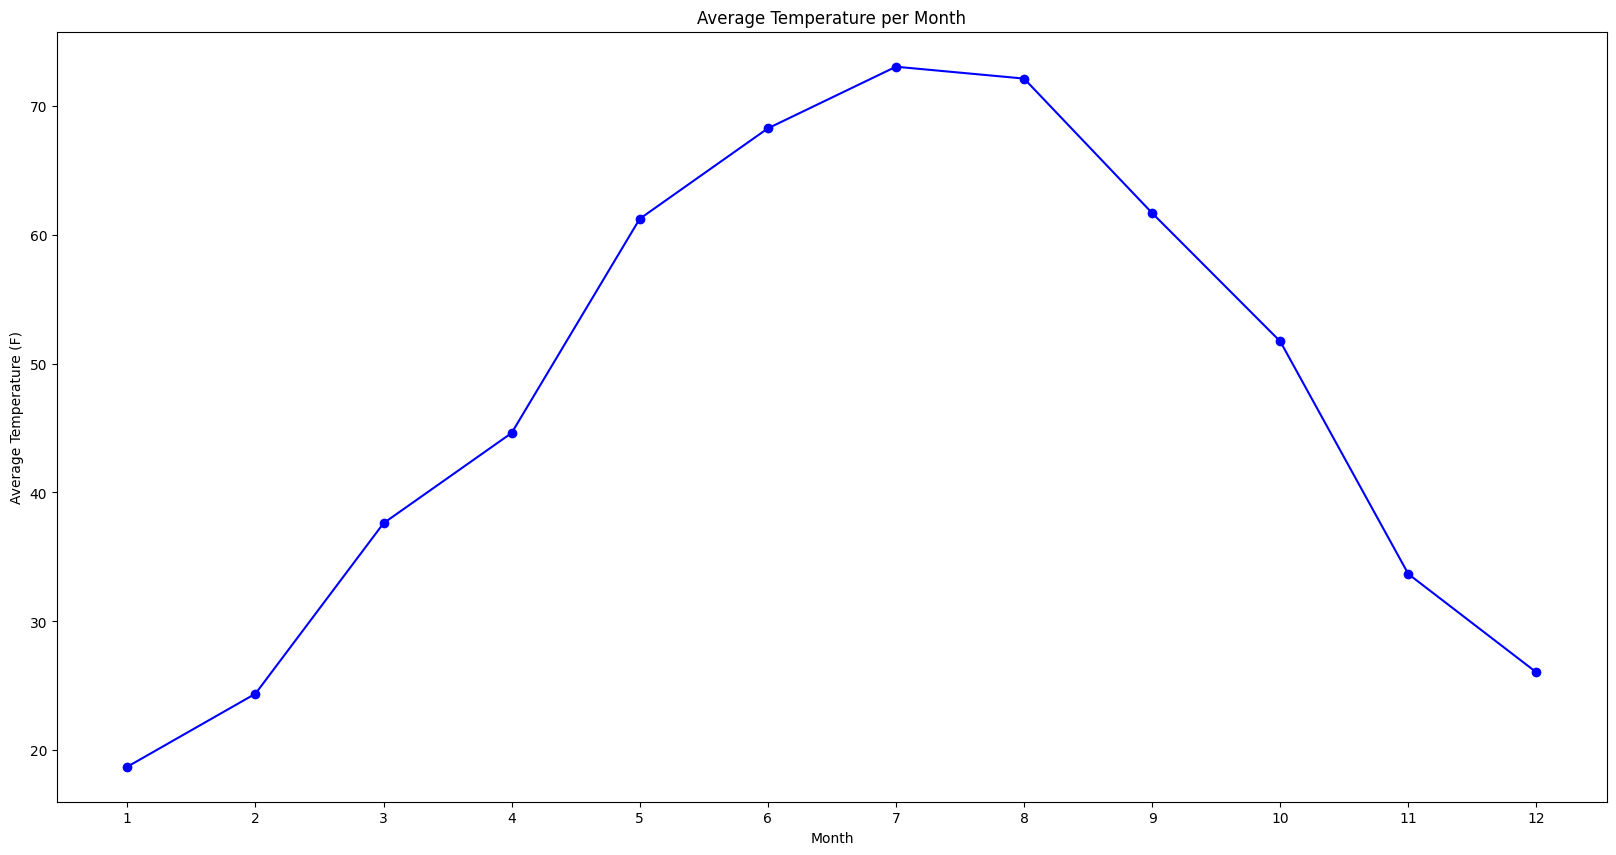

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.title('Average Temperature per Month')
plt.xticks(range(1, 13))
plt.show()


Box plot for weather_2012.

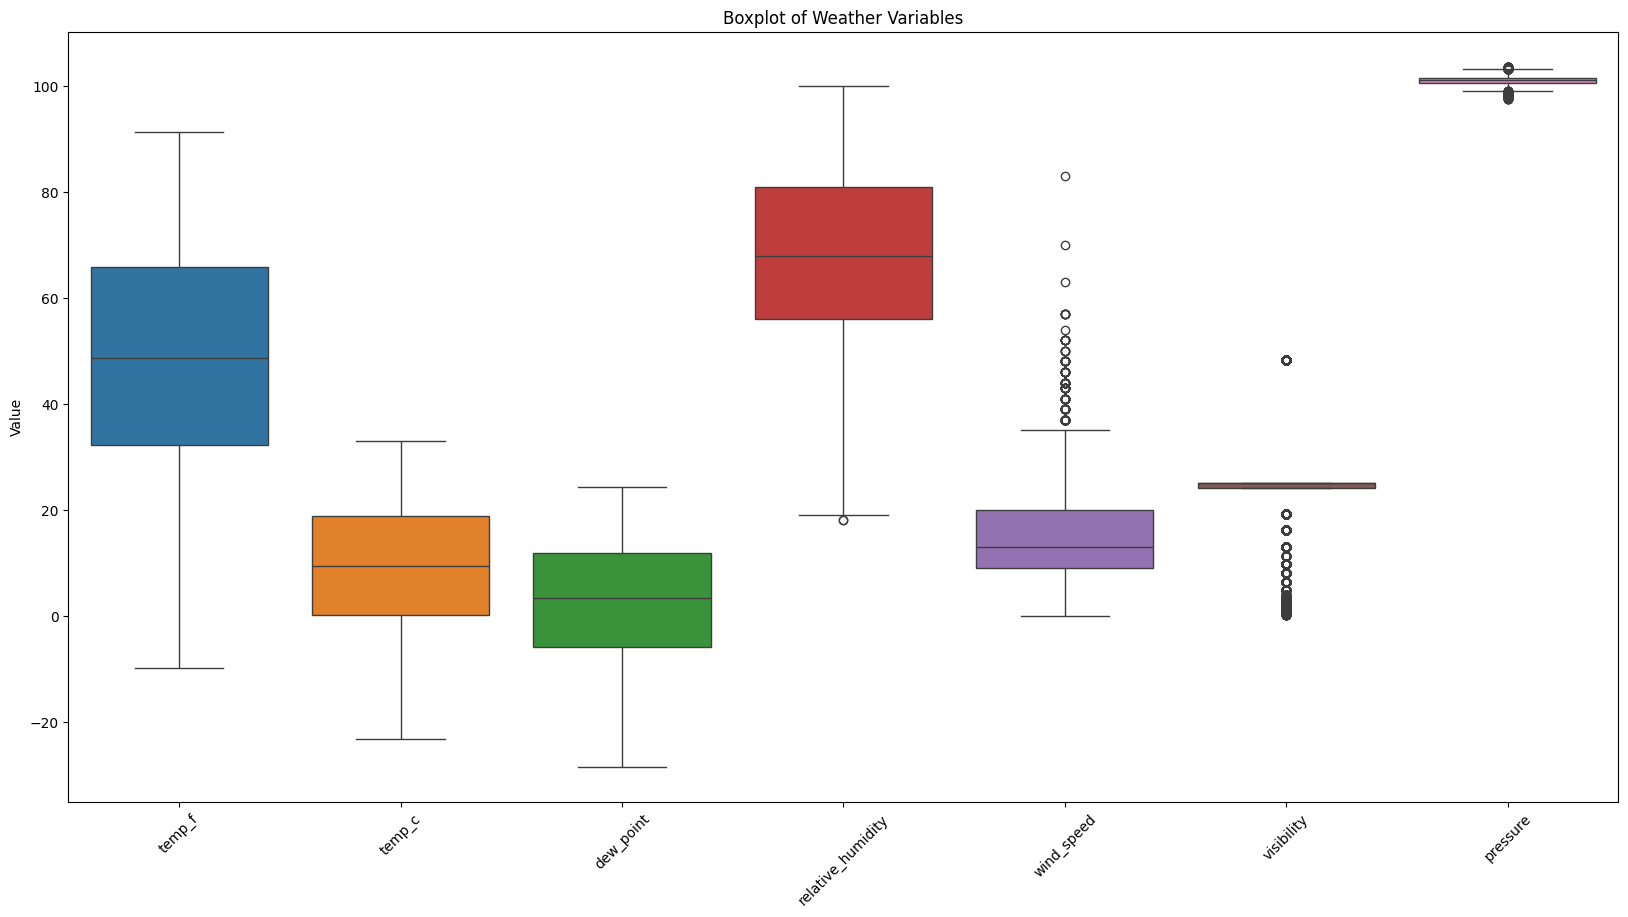

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure']])

plt.title('Boxplot of Weather Variables')
plt.ylabel('Value')

plt.xticks(rotation=45)
plt.show()
